# Test Notebook for Deep Learining FrameWork

In [1]:
# clone git repo
!git clone https://github.com/argman/EAST.git

Cloning into 'EAST'...
remote: Enumerating objects: 270, done.
remote: Total 270 (delta 0), reused 0 (delta 0), pack-reused 270
Receiving objects: 100% (270/270), 2.00 MiB | 3.58 MiB/s, done.
Resolving deltas: 100% (127/127), done.


In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import shutil

In [4]:
shutil.copy('/content/drive/My Drive/east_icdar2015_resnet_v1_50_rbox.zip', '/content/EAST')

'/content/EAST/east_icdar2015_resnet_v1_50_rbox.zip'

In [5]:
# importing required modules 
from zipfile import ZipFile 

# specifying the zip file name 
file_name = "/content/EAST/east_icdar2015_resnet_v1_50_rbox.zip"

# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
	# printing all the contents of the zip file 
	# zip.printdir() 

	# extracting all the files 
	print('Extracting all the files now...') 
	zip.extractall() 
	print('Done!') 

Extracting all the files now...
Done!


In [6]:
cd /content/EAST

/content/EAST


In [0]:
checkpoint_path = '/content/east_icdar2015_resnet_v1_50_rbox/'

In [8]:
cd /content/

/content


In [0]:
# object croping using bounding boxes
import cv2
import os
import numpy as np

In [0]:
newFolder = '/content/test'

In [0]:
if not os.path.exists(newFolder):
  os.makedirs(newFolder)

In [12]:
# number of files sub-dir
cd /content/test

/content/test


In [13]:
# number of files in sub-dir
!ls

MicrosoftTeams-image.png


In [14]:
cd /content/EAST

/content/EAST


In [15]:
!python eval.py --test_data_path=/content/ --gpu_list=0 --checkpoint_path=/content/east_icdar2015_resnet_v1_50_rbox/ \
--output_dir=/content/output/

make: Entering directory '/content/EAST/lanms'
g++ -o adaptor.so -I include  -std=c++11 -O3 -I/usr/include/python3.6m -I/usr/include/python3.6m  -Wno-unused-result -Wsign-compare -g -fdebug-prefix-map=/build/python3.6-0aiVHW/python3.6-3.6.9=. -specs=/usr/share/dpkg/no-pie-compile.specs -fstack-protector -Wformat -Werror=format-security  -DNDEBUG -g -fwrapv -O3 -Wall -L/usr/lib/python3.6/config-3.6m-x86_64-linux-gnu -L/usr/lib -lpython3.6m -lpthread -ldl  -lutil -lm  -Xlinker -export-dynamic -Wl,-O1 -Wl,-Bsymbolic-functions adaptor.cpp include/clipper/clipper.cpp --shared -fPIC
In file included from include/pybind11/pytypes.h:12:0,
                 from include/pybind11/cast.h:13,
                 from include/pybind11/attr.h:13,
                 from include/pybind11/pybind11.h:43,
                 from adaptor.cpp:1:
adaptor.cpp: In function ‘PyObject* PyInit_adaptor()’:
include/pybind11/common.h:232:34: warning: ‘PyObject* pybind11_init()’ is deprecated: PYBIND11_PLUGIN is deprecated

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

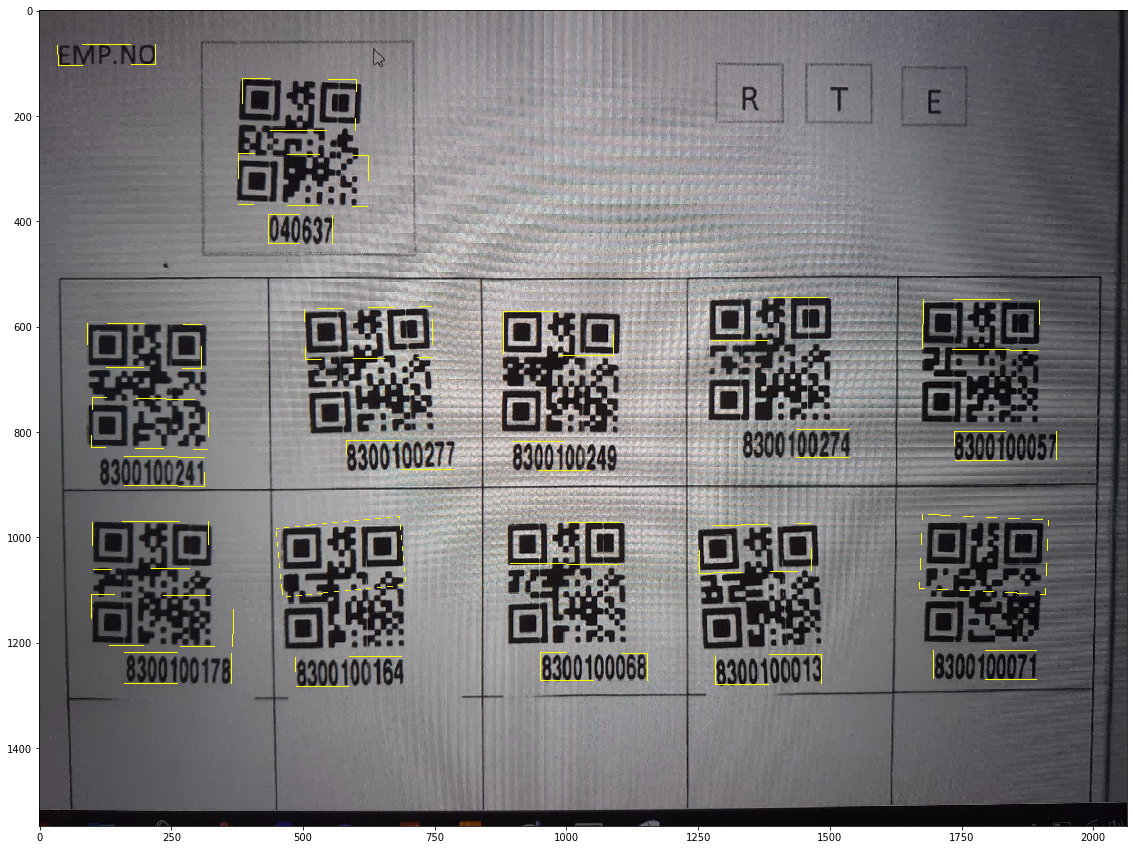

In [21]:
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread("/content/output/MicrosoftTeams-image.png")
#cv.rectangle(img,(29,2496),(604,2992),(255,0,0),5)
plt.figure(figsize=(20, 15))
plt.imshow(img)

In [0]:
# save crop objects
newFolder = '/content/crop_img'

if not os.path.exists(newFolder):
  os.makedirs(newFolder)

In [37]:
cd /content/crop_img

/content/crop_img


In [38]:
for filename in os.listdir('/content/output/'):
  # if filename.endswith(('jpeg','jpg','png','tif'))
  
  if filename.endswith(('txt')):
    with open(os.path.join('/content/output/', filename), 'r') as f:
      index = 0
      for line in f:
        img = cv2.imread(os.path.join('/content/output/', 'MicrosoftTeams-image.png'))
        coords_list = line.strip().split(',')
        coords = list(map(int, coords_list))

        x1 = coords[0]
        y1 = coords[1]
        x2 = coords[2]
        y2 = coords[3]
        x3 = coords[4]
        y3 = coords[5]
        x4 = coords[6]
        y4 = coords[7]

        top_left_x = min([x1,x2,x3,x4])
        top_left_y = min([y1,y2,y3,y4])
        bot_right_x = max([x1,x2,x3,x4])
        bot_right_y = max([y1,y2,y3,y4])



        print(top_left_x, top_left_y, bot_right_x, bot_right_y)

        img = img[top_left_y:bot_right_y, top_left_x:bot_right_x]


        cv2.imwrite('img_'+str(index)+'.jpg',img)

        index += 1
      f.close()

377 272 625 372
385 129 602 229
35 64 221 105
111 846 314 903
99 735 322 833
91 593 309 680
435 387 556 443
1696 1214 1893 1270
1670 956 1915 1108
1274 544 1494 627
893 971 1104 1051
897 818 1094 874
101 969 322 1061
1283 1222 1484 1279
881 571 1090 655
1676 548 1898 645
583 815 787 872
503 562 747 663
1333 795 1538 849
98 1108 369 1208
1736 798 1930 854
449 960 696 1113
951 1218 1154 1272
161 1218 365 1278
1252 974 1465 1068
486 1226 688 1283


In [39]:
cd /content

/content


In [40]:
# Writing zipfile
# importing required modules 
from zipfile import ZipFile 
import os 

def get_all_file_paths(directory): 

	# initializing empty file paths list 
	file_paths = [] 

	# crawling through directory and subdirectories 
	for root, directories, files in os.walk(directory): 
		for filename in files: 
			# join the two strings in order to form the full filepath. 
			filepath = os.path.join(root, filename) 
			file_paths.append(filepath) 

	# returning all file paths 
	return file_paths		 

def main(): 
	# path to folder which needs to be zipped 
	directory = '/content/crop_img'

	# calling function to get all file paths in the directory 
	file_paths = get_all_file_paths(directory) 

	# printing the list of all files to be zipped 
	print('Following files will be zipped:') 
	for file_name in file_paths: 
		print(file_name) 

	# writing files to a zipfile 
	with ZipFile('crop_img.zip','w') as zip: 
		# writing each file one by one 
		for file in file_paths: 
			zip.write(file) 

	# print('All files zipped successfully!')		 


if __name__ == "__main__": 
	main() 


Following files will be zipped:
/content/crop_img/img_19.jpg
/content/crop_img/img_14.jpg
/content/crop_img/img_5.jpg
/content/crop_img/img_20.jpg
/content/crop_img/img_3.jpg
/content/crop_img/img_7.jpg
/content/crop_img/img_22.jpg
/content/crop_img/img_24.jpg
/content/crop_img/img_16.jpg
/content/crop_img/img_12.jpg
/content/crop_img/img_10.jpg
/content/crop_img/img_13.jpg
/content/crop_img/img_21.jpg
/content/crop_img/img_9.jpg
/content/crop_img/img_15.jpg
/content/crop_img/img_6.jpg
/content/crop_img/img_23.jpg
/content/crop_img/img_2.jpg
/content/crop_img/img_8.jpg
/content/crop_img/img_4.jpg
/content/crop_img/img_1.jpg
/content/crop_img/img_0.jpg
/content/crop_img/img_17.jpg
/content/crop_img/img_25.jpg
/content/crop_img/img_11.jpg
/content/crop_img/img_18.jpg
